# Análisis de la actividad 6

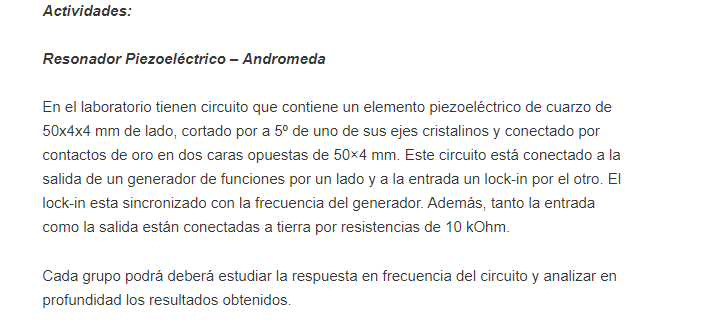

Para la medición más adecuada, la medicion 6 (med_6):
- sensibilidad = 25 $\Rightarrow$ 0.5V
- pendiente = 3 $\Rightarrow$ 24db/oct
- tiempo de integracion = 8 $\Rightarrow$ 0.1 s
- voltaje de entrada  = 1V

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

med_6 = np.loadtxt(f"0506/med6.txt", delimiter=",")

frec = med_6[:,0]
r    = med_6[:,1]
t    = med_6[:,2]

trans_2 = (2*r)**2 #Transferencia al cuadrado
plt.plot(frec, trans_2, '.')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Ajustamos la transferencia al cuadrado en función de la frecuencia por una gaussiana para obtener mejor los parametros

In [24]:
from scipy.optimize import curve_fit

def gauss(x,a,x0,sigma, b):
    return a*np.exp(-((x-x0)**2)/(2*sigma**2)) + b

def lorentzian( x, x0, a, gam ):
    return a * gam / ( gam**2 + ( x - x0 )**2)

x0 = 50096
sigma = 3
a = 0.5
b = 0.02

f0 = 50095.5

popt, pcov = curve_fit(gauss, frec, trans_2, p0 = [a, x0, sigma, b])
popt2, pcov2 = curve_fit(lorentzian, frec, trans_2, p0 = [x0, a, 1])



frecs_aprox = np.linspace(50080, 50110, 500)
trans_aprox = gauss(frecs_aprox, popt[0], popt[1], popt[2], popt[3])
trans_aprox_lorenz = lorentzian(frecs_aprox, popt2[0], popt2[1], popt2[2])

plt.figure()
plt.plot(frec/f0, trans_2, '.k', label = 'datos adquiridos')
#plt.plot(frecs_aprox/f0, trans_aprox, 'r-', label = 'Ajuste gaussiano')
plt.plot(frecs_aprox/f0, trans_aprox_lorenz, '-r', label = 'Ajuste lorenziano')
plt.axhline(max(trans_2)/2,linestyle = 'dashed', label = 'Mitad de altura')
plt.legend()



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Caluclo berreta del factor de calidad o no tan berreta

In [25]:
x2 = 0.999949
x1 = 1.00005

Q = 1/(x1-x2)
print(Q)

9900.990098997278


Grafico la fase.

In [26]:
plt.figure()
plt.plot(frec, t,'.')
plt.grid()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Mediciones 06/06

In [144]:
import seaborn as sns
plt.figure()
for i in range(10):
    med = np.loadtxt(f"0606/med{i+1}.txt", delimiter=",")

    frec = med[:,0]
    r    = med[:,1]
    t    = med_6[:,2]

    trans_2 = (2*r)**2 #Transferencia al cuadrado
    #plt.figure()
    plt.plot(frec, r, '-', label  = str(i+1))
    plt.title(i+1)
    plt.yscale('log')
    plt.legend()
    plt.show()

<ipython-input-144-f53172e6d4d5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

- Medicion 1: satura
- Medicion 2: pico de antiresonancia, satura al pricipio entre 50,1 kHz y 50,8 k Hz
- Medicion 3: barrido fino de antiresonancia entre 50 kHz y 50,3 kHz 
- Medicion 4: ambos picos, hasta aca siempre fueron 100 puntos
- Medicion 5: mejor definicion de los dos picos, medicion entre 50 kHz y 50,45 k Hz tomando 200 puntos
- Medicion 6: buena definicion del minimo
- Medicion 7: buena definicion del maximo
- Medicion 8: mejor definicion del maximo, flashie en el otro
- Medicion 9: entre 45 k y 55k Hz
- Medicion 10: super barrido desde 1 a 100k Hz tomando 500 puntos

In [146]:
med = []
for i in range(10):
    med.append(np.loadtxt(f"0606/med{i+1}.txt", delimiter=","))

In [147]:
x0 = f0
a = 0.3

popt2, pcov2 = curve_fit(lorentzian, med[7][:,0], (med[7][:,1]*2)**2, p0 = [x0, a, 1])
frecs_aprox = np.linspace(50080, 50110, 500)
trans_aprox_lorenz = lorentzian(frecs_aprox, popt2[0], popt2[1], popt2[2])



plt.figure()
plt.plot(med[7][:,0]/f0,(2*med[7][:,1])**2, 'k.')
plt.plot(frecs_aprox/f0, trans_aprox_lorenz, '-r', label = 'Ajuste lorenziano')
plt.axhline((max((2*med[7][:,1])**2) + min((2*med[7][:,1])**2))/2,linestyle = 'dashed', label = 'Mitad de altura')
plt.legend()
plt.grid()

<ipython-input-147-97e7d0174aa9>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [154]:
from scipy.odr import RealData, Model, ODR
import scipy.stats as stats
model = Model(lorentzian)
mydata = RealData(med[7][:,0], ((2*med[7][:,1])**2))
myodr = ODR(mydata, model, beta0 = [50096, 0.5 , 1])
myoutput = myodr.run()
myoutput.pprint()
pval = 1 - stats.chi2.cdf(myoutput.res_var, len(yn) - len(M))

print(f"\nChi square of fit / dof: {myoutput.res_var} / {len(yn) - len(M)}")
print(f"P-value: {pval}\n")


TypeError: lorentzian() missing 2 required positional arguments: 'a' and 'gam'

In [139]:
from scipy.stats import chi2

def chisq(ydata, ymodelo,sd):
    chisq = sum(((ydata-ymodelo)/sd)**2)
    return chisq
    
def rval( ydata, chi, gl):  #reduce chi square   gl = numero de parametros de la funcion es bueno q este cerca de 1
    k=len(ydata)-1-gl
    rval=chi/k   
    return rval, k

def pvalor(chi, k):         #integral de ña distribucion de chisq es bueno q este cerca de 0
    p  = 1- chi2.cdf(chi, k)
    return p
frecs_aprox = np.linspace(50080, 50110, 200)
trans_aprox_lorenz = lorentzian(frecs_aprox, popt2[0], popt2[1], popt2[2])

chi = chisq((2*med[7][:,1])**2, trans_aprox_lorenz, 0.001)
rvalue = rval((2*med[7][:,1])**2, chi, 3)
pvalue = pvalor(chi, rvalue[1])
print(f'r value = {rvalue[0]} \n p value = {pvalue}')

r value = 7.20136843533527 
 p value = 0.0


#### Calculo el factor de calidad Q

In [118]:
x1 = 0.999937
x2 = 1.00005
Q = 1/(x2-x1)
print(Q)

8849.55752211287


## Más figuras de análisis para presentar

In [121]:

popt2, pcov2 = curve_fit(lorentzian, med[1][:,0][10:], (med[1][:,1][10:]*2)**2, p0 = [50300, 1,1])
frecs_aprox = np.linspace(50080, 50110, 500)
trans_aprox_lorenz = lorentzian(frecs_aprox, popt2[0], popt2[1], popt2[2])

plt.figure()
plt.plot(med[5][:,0], (2*med[5][:,1])**2, '.k')
plt.plot(med[1][:,0][10:], (2*med[1][:,1][10:])**2 ,'k.')
#plt.plot(med[2][:,0], med[2][:,1] ,'*')
#plt.plot(frecs_aprox, trans_aprox_lorenz, '-r', label = 'Ajuste lorenziano')

plt.yscale('log')

<ipython-input-121-3fced04a1fc0>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [112]:
plt.figure()
plt.plot(med[4][:,0], (2*med[4][:,1])**2, '.k')
plt.yscale('log')


<ipython-input-112-0dcc41cdbf34>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [113]:
plt.figure()
plt.plot(med[9][:,0], (2*med[9][:,1])**2, '.k')
#plt.yscale('log')

<ipython-input-113-acd8293034a7>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …